#### Question 1

Poisson random Process
2.5 arrivals per second -> lambda = 2.5, t = 1 second, mu = 2.5/1 = 2.5

Generate 100,000 numbers reflecting the number of random arrivals in one second

Plot the histogram and determine how closely the numbers match what you would expect


In [2]:
# Necessary imports
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

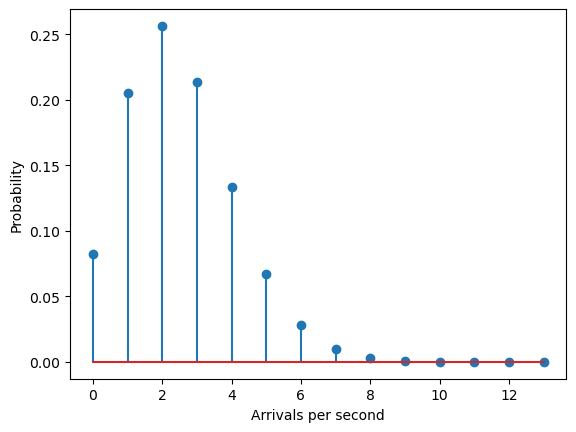

In [3]:
mu = 2.5 # mu = lambda/time
k = np.arange(0,14) # This is creating the range of x-axis
packet_distribution = stats.poisson(mu) # Creating poisson distribution
pmf_k = packet_distribution.pmf(k)
plt.stem(k,pmf_k) # Theoretical pmf
plt.xlabel("Arrivals per second")
plt.ylabel("Probability")
plt.show()

# sum of probabilities from k=0 to k=3
# print(f"Sum of probabilities from k=0 to k=3: {packet_distribution.pmf(np.arange(0,4)).sum() : 0.3f}")

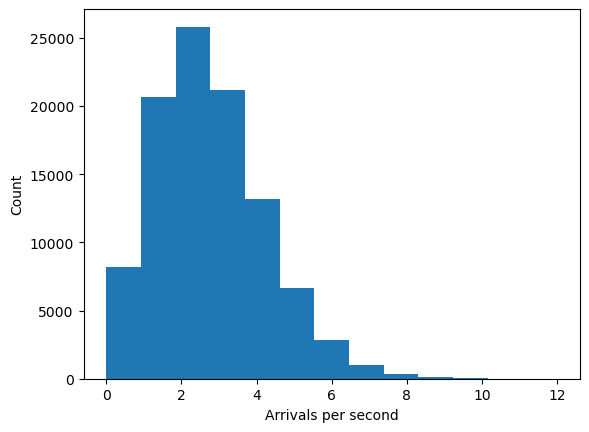

In [4]:
n_pts = int(100e3)
x = stats.poisson(mu).rvs(n_pts)
plt.hist(x, bins = 13)
plt.xlabel("Arrivals per second")
plt.ylabel("Count")
plt.show()

According to the graphs shown above, the theoretical results match the simulated results.
This means that the simulated numbers match the expectations set before the experiment.

#### Question 2

Poisson random process in which 5 arrivals per hour are expected.
Generate 100,000 random numbers reflecting the numbers of random arrivals in one minute.
Plot the histogram and determine how closely the numbers match what you would expect.
Also plot the histogram of the time between arrivals. Does that match what you expect?

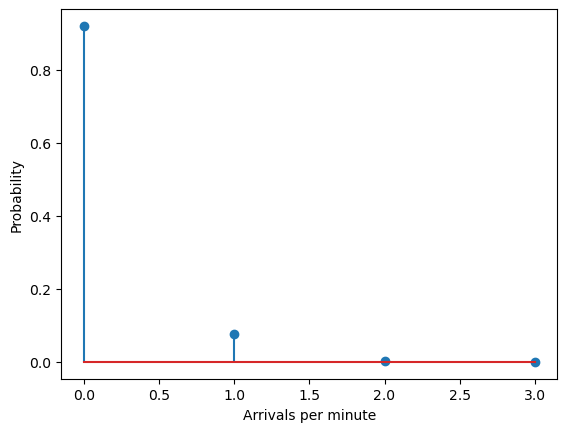

In [5]:
lamb = 5
time = 60
mu = lamb/time
k = np.arange(0,4) # This is creating the range of x-axis
packet_distribution = stats.poisson(mu) # Creating poisson distribution
pmf_k = packet_distribution.pmf(k)
plt.stem(k,pmf_k) # Theoretical pmf
plt.xlabel("Arrivals per minute")
plt.ylabel("Probability")
plt.show()

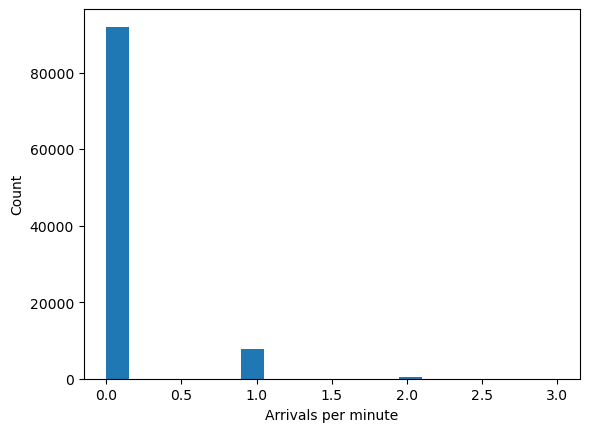

In [6]:
n_pts = int(100e3)
x = stats.poisson(mu).rvs(n_pts)
plt.hist(x, bins = 20)
plt.xlabel("Arrivals per minute")
plt.ylabel("Count")
plt.show()

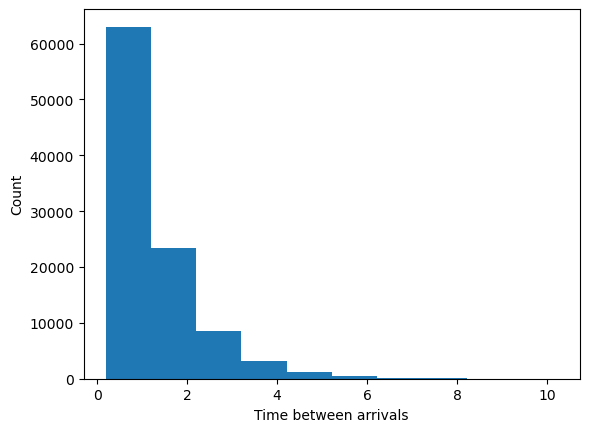

In [7]:
timeBetween = stats.expon(1/lamb).rvs(n_pts)
plt.hist(timeBetween)
plt.xlabel("Time between arrivals")
plt.ylabel("Count")
plt.show()

#### Thoughts Question 2

From the results obtained above, it is possible to see that the theoretical results match the simulated results. It makes sense that every minute the probability of an arrival is 0 since there are only 5 arrivals every hour. 5 arrivals every hour means potentially an arrival every 12 minutes, so expecting no arrivals every minute is correct inference.

#### Question 3

Hand Calculation:
Hand calculation is shown in my github: https://github.com/MiguelAcostaDelVecchio/RandomProcesses
Work is shown in Week4/HW4_HandCalc.pdf

#### Question 4

Assume we have a random Poisson process where the arrival rate varies linearly from 1 to 10 arrivals per second
over the course of three hours. Generate one random number for each of the 10,800 seconds in the three-hour period.
How would you be able to tell from the random numbers alone if you were properly varying the arrival rate?

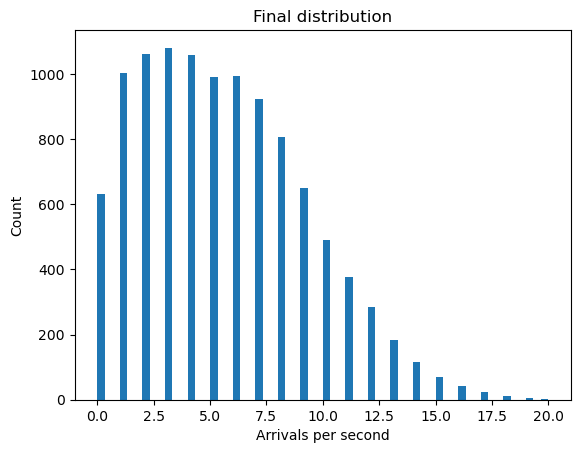

In [20]:
totalTime = 10800
sampleList = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


"""
randomList = random.choices(
  sampleList, weights=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10), k=totalTime)

# Making sure I have a correct linear distribution for lambda
plt.hist(randomList, bins = 10)
plt.title("Arrival rate (lambda)")
plt.xlabel("Arrivals per second")
plt.ylabel("Count")
plt.show()

finalDist = []
for i in range(0,totalTime):
    finalDist.append(list(stats.poisson(randomList[i]).rvs(1)))
    finalDist[i] = finalDist[i][0]

plt.hist(finalDist, bins = 60)
plt.title("Final distribution")
plt.xlabel("Arrivals per second")
plt.ylabel("Count")
plt.show()
"""

# Lambda that varies linearly over the course of 3 hours
frag_time = int(totalTime/10)
testing = [1 for i in range(frag_time)]
testing2 = [2 for i in range(frag_time)]
testing3 = [3 for i in range(frag_time)]
testing4 = [4 for i in range(frag_time)]
testing5 = [5 for i in range(frag_time)]
testing6 = [6 for i in range(frag_time)]
testing7 = [7 for i in range(frag_time)]
testing8 = [8 for i in range(frag_time)]
testing9 = [9 for i in range(frag_time)]
testing10 = [10 for i in range(frag_time)]
lst_all = testing+testing2+testing3+testing4+testing5+testing6+testing7+testing8+testing9+testing10

finalDist = []
for i in range(0,totalTime):
    finalDist.append(list(stats.poisson(lst_all[i]).rvs(1)))
    finalDist[i] = finalDist[i][0]

plt.hist(finalDist, bins = 60)
plt.title("Final distribution")
plt.xlabel("Arrivals per second")
plt.ylabel("Count")
plt.show()


#### Thoughts on Question 4

From the numbers alone, I would expect the final distribution to have the
most probability between 1 and 10 due to the linearity of lambda over the course of the 3 hours.
If I see a lot of numbers outside of the 1 to 10 range I would say that I most likely
did something wrong.